Import Libraries and Load Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import tensorflow_datasets as tfds


test_set , test_info= tfds.load("eurosat/rgb", split='train[0:20%]',shuffle_files=True, with_info=True, as_supervised=True)
train_set, train_info = tfds.load("eurosat/rgb", split='train[20%:100%]', shuffle_files=True, with_info=True, as_supervised = True)

assert isinstance(test_set, tf.data.Dataset)
assert isinstance(train_set, tf.data.Dataset)

test_images = []
test_labels = []

train_images = []
train_labels = []

for image, label in test_set:
    
    test_images.append(np.array(image)/255)
    test_labels.append(np.array(label))

    
for image, label in train_set:
    train_images.append(np.array(image)/255)
    train_labels.append(np.array(label))
    
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)
train_images = np.array(train_images)
train_labels = np.array(train_labels)


print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)



input_shape = (64,64,3)

Shuffling and writing examples to /root/tensorflow_datasets/eurosat/rgb/2.0.0.incomplete1021D1/eurosat-train.tfrecord


Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.
(5400, 64, 64, 3)
(5400,)
(21600, 64, 64, 3)
(21600,)


Display Samples

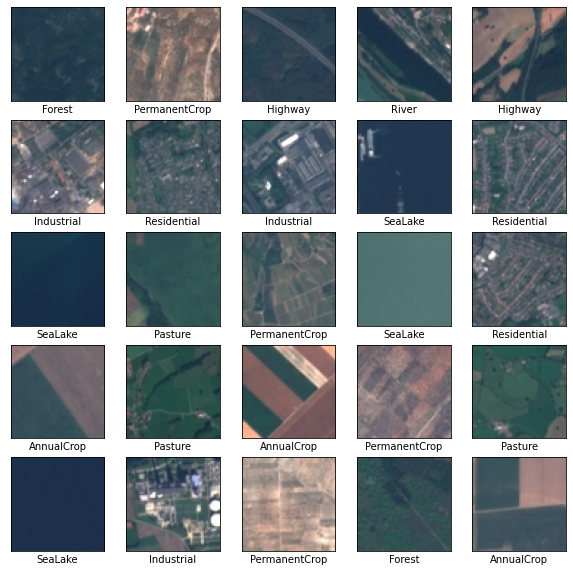

In [2]:
class_names=['AnnualCrop', 'Forest', 'HerbaceousVegetation', 
        'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 
        'Residential', 'River', 'SeaLake']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Create Model and Compile

In [4]:
model = keras.Sequential([
        keras.layers.Conv2D(filters = 64 , kernel_size = 1,  strides = 1, input_shape=input_shape, activation='relu'),
        keras.layers.Conv2D(filters = 128 , kernel_size = 3,  strides = 1, activation='relu'),
        #keras.layers.MaxPooling2D(pool_size=2, strides=2),
        keras.layers.Conv2D(filters = 256 , kernel_size = 5, strides = 1, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=2, strides=2),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation = 'relu' ),
        keras.layers.Dense(128, activation = 'relu' ),
        #keras.layers.Dense(128, activation = 'relu' ),
        keras.layers.Dense(10)
    ])


model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])


Create Model Summary

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                13779008  
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

Train and Evaluate the Model

In [6]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs = 10, batch_size = 32)

test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test Accuracy : ",test_acc)

Epoch 1/10
  2/608 [..............................] - ETA: 15s - loss: 2.6190 - accuracy: 0.0625WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0174s vs `on_train_batch_end` time: 0.0311s). Check your callbacks.


608/608 [==============================] - 33s 55ms/step - loss: 1.3927 - accuracy: 0.4910 - val_loss: 1.1457 - val_accuracy: 0.6213
Epoch 2/10
608/608 [==============================] - 33s 55ms/step - loss: 0.8757 - accuracy: 0.6920 - val_loss: 0.7605 - val_accuracy: 0.7306
Epoch 3/10
608/608 [==============================] - 33s 54ms/step - loss: 0.6831 - accuracy: 0.7588 - val_loss: 0.6705 - val_accuracy: 0.7579
Epoch 4/10
608/608 [==============================] - 33s 54ms/step - loss: 0.5859 - accuracy: 0.7940 - val_loss: 0.6755 - val_accuracy: 0.7565
Epoch 5/10
608/608 [==============================] - 33s 54ms/step - loss: 0.4845 - accuracy: 0.8291 - val_loss: 0.6254 - val_accuracy: 0.7778
Epoch 6/10
608/608 [==============================] - 33s 54ms/step - loss: 0.3977 - accuracy: 0.8582 - val_loss: 0.5484 - val_accuracy: 0.8130
Epoch 7/10
608/608 [==============================] - 33s 54ms/step - loss: 0.3298 - accuracy: 0.8835 - val_loss: 0.5513 - val_accuracy: 0.8134
Epo

Calculating Train and Test Accuracy

In [7]:
training_loss , training_accuracy = model.evaluate(train_images,train_labels)

  1/675 [..............................] - ETA: 14s - loss: 0.0735 - accuracy: 1.0000WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0039s vs `on_test_batch_end` time: 0.0216s). Check your callbacks.


675/675 [==============================] - 12s 18ms/step - loss: 0.1789 - accuracy: 0.9452


In [8]:
print("Train Accuracy : ",training_accuracy)
print("Test Accuracy : ",test_acc)

Train Accuracy :  0.9451851844787598
Test Accuracy :  0.8311111330986023


Plotting the Accuracy and Loss Graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


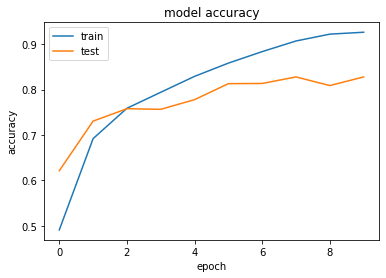

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


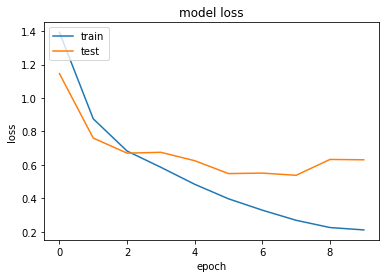

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()